In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Importing the Libraries

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train[train.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

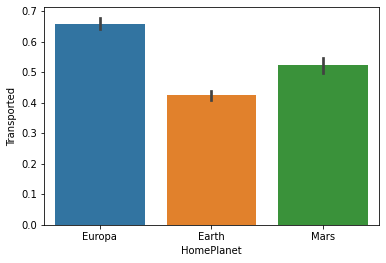

In [8]:
#unique values of HomePlanet
train['HomePlanet'].unique()
train['HomePlanet']
sns.barplot(data=train,x='HomePlanet',y='Transported')

<AxesSubplot:xlabel='Destination', ylabel='Transported'>

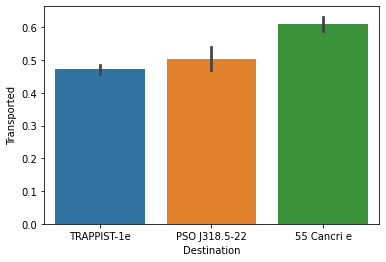

In [9]:
#unique values of Destination
train['Destination'].unique()
sns.barplot(data=train,x='Destination',y='Transported')

In [10]:
#splitting the deck feature into 3 features- Deck,Number,Cabin
train[['Deck', 'Number', 'Side']] = train['Cabin'].str.split("/", expand=True)
test[['Deck', 'Number', 'Side']] = test['Cabin'].str.split("/", expand=True)
#Age feature into ranges
bins=[0,13,18,25,200]
labels=['<=13','13-18','18-25','>25']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Number', 'Side', 'AgeGroup'],
      dtype='object')

In [11]:
#replacing name with last name
train['Name']=train['Name'].apply(lambda x:str(x).split(" ")[-1])
test['Name']=test['Name'].apply(lambda x:str(x).split(" ")[-1])

In [12]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Deck            199
Number          199
Side            199
AgeGroup        179
dtype: int64

# Preprocessing the data

In [13]:
###Precprocessing
#filling the missing values

In [14]:
#two new variables- group_id- group number
#id_in_group- passenger number in that group
train[['group_id', 'id_in_group']]=train['PassengerId'].str.split("_", expand=True)
test[['group_id', 'id_in_group']]=test['PassengerId'].str.split("_", expand=True)
#another feature total_in_group- number of passengers in that group
train['total_in_group']=train['group_id'].map(lambda x: pd.concat([train['group_id'],test['group_id']]).value_counts()[x])
test['total_in_group']=test['group_id'].map(lambda x: pd.concat([train['group_id'],test['group_id']]).value_counts()[x])
#from below output it is clear that within group numbers have same HomePlanet
# because train['group_id'].nunique()- 201(nan values of Homeplanet)== number of rows (6107)
#every group has only one HomePlanet
#within same group has different destinations

In [15]:
#nan values for cabin,number and side
train[['Deck','Number','Side']]=train.groupby('group_id')[['Deck','Number','Side']].fillna(method='ffill').fillna(np.nan)
test[['Deck','Number','Side']]=test.groupby('group_id')[['Deck','Number','Side']].fillna(method='ffill').fillna(np.nan)
#train[['Deck','Number','Side']]=train.groupby('Name')[['Deck','Number','Side']].fillna(method='ffill').fillna(np.nan)
#test[['Deck','Number','Side']]=test.groupby('Name')[['Deck','Number','Side']].fillna(method='ffill').fillna(np.nan)

In [16]:
#fill nan values in HomePlanet based on previous conclusion
#remaining values with nan
train['HomePlanet'] = train.groupby('group_id')['HomePlanet'].fillna(method='ffill').fillna(np.nan)
test['HomePlanet']=test.groupby('group_id')['HomePlanet'].fillna(method='ffill').fillna(np.nan)
train[['Deck','Number','Side','HomePlanet']].groupby(['HomePlanet','Deck']).size().reset_index()

,HomePlanet,Deck,0
0,Earth,E,402
1,Earth,F,1623
2,Earth,G,2531
3,Europa,A,258
4,Europa,B,786
5,Europa,C,753
6,Europa,D,190
7,Europa,E,129
8,Europa,T,4
9,Mars,D,287


In [17]:
#Deck values Earth- G,E,F
#            Europa- A,B,C,D,E,T
#            Mars- D,E,F
def some(x):
    if pd.isnull(x['HomePlanet']):
        if x['Deck']=='G':
            return 'Earth'
        elif x['Deck']=='T':
            return 'Europa'
    else:
        return x['HomePlanet']
train['HomePlanet'] = train.apply(some,axis=1)
test['HomePlanet']=test.apply(some,axis=1)

In [18]:
train[['HomePlanet','VIP']].groupby(['HomePlanet','VIP']).size().reset_index()
#Earth has no VIPs

,HomePlanet,VIP,0
0,Earth,False,4555
1,Europa,False,1980
2,Europa,True,132
3,Mars,False,1669
4,Mars,True,64


In [19]:
#fill the nan values of VIP based on previous conclusion
train.loc[train['HomePlanet']=='Earth','VIP']=train.loc[train['HomePlanet']=='Earth','VIP'].fillna(False)
test.loc[test['HomePlanet']=='Earth','VIP']=test.loc[test['HomePlanet']=='Earth','VIP'].fillna(False)

In [20]:
#train['CryoSleep'].fillna(False,inplace=True)
#test['CryoSleep'].fillna(False,inplace=True)

<AxesSubplot:xlabel='AgeGroup', ylabel='total_expenses'>

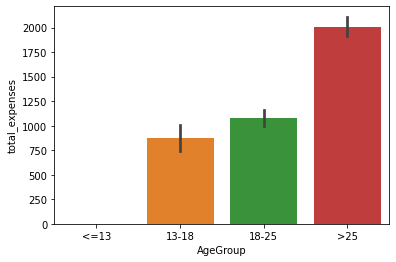

In [21]:
##Replacing expenses NAN values with zero
#train.fillna({'RoomService':0, 'FoodCourt':0, 'ShoppingMall':0, 'Spa':0, 'VRDeck':0},inplace=True)
#making all separate expenses into single column "total_expenses"
train['total_expenses']=train.iloc[:,7:12].sum(axis=1,skipna=False)
test['total_expenses']=test.iloc[:,7:12].sum(axis=1,skipna=False)
sns.barplot(data=train,x='AgeGroup',y='total_expenses')
#clearly children have no bill

<AxesSubplot:xlabel='CryoSleep', ylabel='total_expenses'>

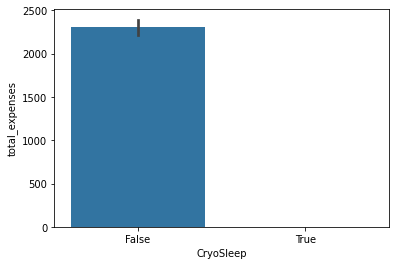

In [22]:
sns.barplot(data=train,x='CryoSleep',y='total_expenses')
#Cryosleep passengers have no bills

In [23]:
train.isnull().sum()

PassengerId         0
HomePlanet         92
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP                87
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name                0
Transported         0
Deck              134
Number            134
Side              134
AgeGroup          179
group_id            0
id_in_group         0
total_in_group      0
total_expenses    908
dtype: int64

In [24]:
#for all services
cond5=(train['AgeGroup']=='0-13')|(train['CryoSleep']==True)
cond6=(test['AgeGroup']=='0-13')|(test['CryoSleep']==True)
train.loc[cond5,'RoomService']=train.loc[cond5,'RoomService'].fillna(0)
test.loc[cond6,'RoomService']=test.loc[cond6,'RoomService'].fillna(0)

train.loc[cond5,'FoodCourt']=train.loc[cond5,'FoodCourt'].fillna(0)
test.loc[cond6,'FoodCourt']=test.loc[cond6,'FoodCourt'].fillna(0)

train.loc[cond5,'ShoppingMall']=train.loc[cond5,'ShoppingMall'].fillna(0)
test.loc[cond6,'ShoppingMall']=test.loc[cond6,'ShoppingMall'].fillna(0)

train.loc[cond5,'Spa']=train.loc[cond5,'Spa'].fillna(0)
test.loc[cond6,'Spa']=test.loc[cond6,'Spa'].fillna(0)

train.loc[cond5,'VRDeck']=train.loc[cond5,'VRDeck'].fillna(0)
test.loc[cond6,'VRDeck']=test.loc[cond6,'VRDeck'].fillna(0)

#AgeGroup vs VIP
train[['VIP','AgeGroup']].groupby(['VIP','AgeGroup']).size().reset_index()
#all VIPs are adults(>18)

,VIP,AgeGroup,0
0,False,<=13,800
1,False,13-18,733
2,False,18-25,2094
3,False,>25,4604
4,True,<=13,0
5,True,13-18,0
6,True,18-25,4
7,True,>25,194


In [25]:
#nan values of VIP
#most of the VIPs are above 25
#train.loc[(train['AgeGroup']!='>25'),'VIP']=train.loc[(train['AgeGroup']!='>25'),'VIP'].fillna(False)
#test.loc[(test['AgeGroup']!='>25'),'VIP']=test.loc[(test['AgeGroup']!='>25'),'VIP'].fillna(False)
#train.isnull().sum()

In [26]:
#same group often has same last name - mentioned in data description
train['Name']=train.groupby('group_id')['Name'].fillna(method='ffill').fillna(np.nan)
test['Name']=test.groupby('group_id')['Name'].fillna(method='ffill').fillna(np.nan)

In [27]:
train[['AgeGroup','CryoSleep','total_expenses','Destination']].groupby(['AgeGroup','CryoSleep','total_expenses','Destination']).size().reset_index().query('total_expenses==0')
#not child, no CryoSleep with no bill have destination TRAPPIST-1e
cond1=((train['AgeGroup']!='<=13') & (train['CryoSleep']==False) &(train['total_expenses']==0))
cond2=((test['AgeGroup']!='<=13') & (test['CryoSleep']==False) &(test['total_expenses']==0))
train.loc[cond1,'Destination']=train.loc[cond1,'Destination'].fillna('TRAPPIST-1e')
test.loc[cond2,'Destination']=test.loc[cond2,'Destination'].fillna('TRAPPIST-1e')

In [28]:
#from homeplanet to destination
train[['HomePlanet','Transported','Destination']].groupby(['HomePlanet','Destination']).mean().reset_index()

,HomePlanet,Destination,Transported
0,Earth,55 Cancri e,0.502874
1,Earth,PSO J318.5-22,0.502770
2,Earth,TRAPPIST-1e,0.389083
3,Europa,55 Cancri e,0.690929
4,Europa,PSO J318.5-22,0.736842
5,Europa,TRAPPIST-1e,0.637117
6,Mars,55 Cancri e,0.608247
7,Mars,PSO J318.5-22,0.440000
8,Mars,TRAPPIST-1e,0.512081


In [29]:
train[['HomePlanet','Transported','Destination','Deck']].groupby(['HomePlanet','Deck']).size().reset_index()

,HomePlanet,Deck,0
0,Earth,E,402
1,Earth,F,1623
2,Earth,G,2580
3,Europa,A,258
4,Europa,B,786
5,Europa,C,753
6,Europa,D,190
7,Europa,E,129
8,Europa,T,5
9,Mars,D,287


In [30]:
train[['HomePlanet','AgeGroup','Destination']].groupby(['AgeGroup','HomePlanet','Destination']).size().reset_index()
#Europa with Age<25, never goes to PSO J318.5-22

,AgeGroup,HomePlanet,Destination,0
0,<=13,Earth,55 Cancri e,132
1,<=13,Earth,PSO J318.5-22,54
2,<=13,Earth,TRAPPIST-1e,392
3,<=13,Europa,55 Cancri e,9
4,<=13,Europa,PSO J318.5-22,0
5,<=13,Europa,TRAPPIST-1e,33
6,<=13,Mars,55 Cancri e,23
7,<=13,Mars,PSO J318.5-22,0
8,<=13,Mars,TRAPPIST-1e,151
9,13-18,Earth,55 Cancri e,109


In [31]:
pd.crosstab(train['HomePlanet'],train['Destination'])
#from Europa less people has destination PSO J318.5-22
#from mars high preferred destination is TRAPPIST-1e
#PSO J318.5-22 has majority from earth

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,696,722,3151
Europa,893,19,1207
Mars,194,50,1490


In [32]:
#train.loc[train['HomePlanet']=='Mars','Destination']=train.loc[train['HomePlanet']=='Mars','Destination'].fillna('TRAPPIST-1e')
#test.loc[test['HomePlanet']=='Mars','Destination']=test.loc[test['HomePlanet']=='Mars','Destination'].fillna('TRAPPIST-1e')
#train.loc[train['Destination']=='PSO J318.5-22','HomePlanet']=train.loc[train['Destination']=='PSO J318.5-22','HomePlanet'].fillna('Earth')
#test.loc[test['Destination']=='PSO J318.5-22','HomePlanet']=test.loc[test['Destination']=='PSO J318.5-22','HomePlanet'].fillna('Earth')

In [33]:
bins=[0,400,800,100000]
labels=['0-400','400-800','800-1000000']
train['expenses_group'] = pd.cut(train['total_expenses'], bins=bins, labels=labels, right=False)
test['expenses_group'] = pd.cut(test['total_expenses'], bins=bins, labels=labels, right=False)

In [34]:
#train[['HomePlanet','expenses_group','Destination']].groupby(['expenses_group','HomePlanet']).size().reset_index()
#400-800 range, Europa and mars are very less
#train.loc[train['expenses_group']=='400-800','HomePlanet']=train.loc[train['expenses_group']=='400-800','HomePlanet'].fillna('Europa')
#test.loc[test['expenses_group']=='400-800','HomePlanet']=test.loc[test['expenses_group']=='400-800','HomePlanet'].fillna('Europa')

In [35]:
#fill VIP values as False-because of majority
#train['VIP'].fillna(False,inplace=True)
#test['VIP'].fillna(False,inplace=True)

In [36]:
train.isnull().sum()

PassengerId         0
HomePlanet         92
CryoSleep         217
Cabin             199
Destination       180
Age               179
VIP                87
RoomService       113
FoodCourt         113
ShoppingMall      112
Spa               118
VRDeck            126
Name                0
Transported         0
Deck              134
Number            134
Side              134
AgeGroup          179
group_id            0
id_in_group         0
total_in_group      0
total_expenses    908
expenses_group    908
dtype: int64

In [37]:
train[['Transported','RoomService','CryoSleep']].query('CryoSleep==False').groupby(['Transported']).mean()

,RoomService
Transported,
False,448.336229
True,150.920978


In [38]:
#fill total_expenses
#def func3(x):
#    if pd.isnull(x['total_expenses']):
#        if x['HomePlanet']=='Earth':
#            return 973
#        elif x['HomePlanet']=='Europa':
#            return 6023
#        elif x['HomePlanet']=='Mars':
#            return 1711
#    else:
#        return x['total_expenses']
#train['total_expenses']=train.apply(func3,axis=1)
#test['total_expenses']=test.apply(func3,axis=1)
#bins=[0,400,800,100000]
#labels=['0-400','400-800','800-1000000']
#train['expenses_group'] = pd.cut(train['total_expenses'], bins=bins, labels=labels, right=False)
#test['expenses_group'] = pd.cut(test['total_expenses'], bins=bins, labels=labels, right=False)

In [39]:
train.isnull().sum()

PassengerId         0
HomePlanet         92
CryoSleep         217
Cabin             199
Destination       180
Age               179
VIP                87
RoomService       113
FoodCourt         113
ShoppingMall      112
Spa               118
VRDeck            126
Name                0
Transported         0
Deck              134
Number            134
Side              134
AgeGroup          179
group_id            0
id_in_group         0
total_in_group      0
total_expenses    908
expenses_group    908
dtype: int64

In [40]:
train[['Age','HomePlanet']].groupby(['HomePlanet']).mean()

,Age
HomePlanet,
Earth,26.029675
Europa,34.424027
Mars,29.306982


In [41]:
#fill total_expenses
#def func4(x):
#    if pd.isnull(x['Age']):
#        if x['HomePlanet']=='Earth':
#            return 26
#        elif x['HomePlanet']=='Europa':
#            return 34
#        elif x['HomePlanet']=='Mars':
#            return 29
#    else:
#        return x['Age']
#train['Age']=train.apply(func4,axis=1)
#test['Age']=test.apply(func4,axis=1)

In [42]:
train[['group_id','Transported','HomePlanet']].groupby(['HomePlanet','group_id']).mean().reset_index()

,HomePlanet,group_id,Transported
0,Earth,0002,1.000000
1,Earth,0004,1.000000
2,Earth,0005,1.000000
3,Earth,0006,1.000000
4,Earth,0007,1.000000
...,...,...,...
6144,Mars,9224,0.000000
6145,Mars,9231,0.666667
6146,Mars,9239,0.000000
6147,Mars,9241,0.000000


In [43]:
train["total_in_group"] = np.where(train["total_in_group"]==1, 0, 1)
test["total_in_group"] = np.where(test["total_in_group"]==1, 0, 1)

In [44]:
#conversion of datatypes
train['Number']=train['Number'].astype(float)
train['group_id']=train['group_id'].astype(float)
train['id_in_group']=train['id_in_group'].astype(int)
train['CryoSleep']=train['CryoSleep'].astype(bool)
train['VIP']=train['VIP'].astype(bool)
test['Number']=test['Number'].astype(float)
test['group_id']=test['group_id'].astype(float)
test['id_in_group']=test['id_in_group'].astype(int)
test['CryoSleep']=test['CryoSleep'].astype(bool)
test['VIP']=test['VIP'].astype(bool)

In [45]:
train['Number'].max()

1894.0

In [46]:
#train['Number'].max()
#bins=[0,500,1000,1500,2000]
#labels=['1','2','3','4']
#train['group_id_divide'] = pd.cut(train['Number'], bins=bins, labels=labels, right=False)
#test['group_id_divide'] = pd.cut(test['Number'], bins=bins, labels=labels, right=False)

In [47]:
#train[['group_id_divide','Transported','CryoSleep']].groupby(['CryoSleep','group_id_divide']).mean()

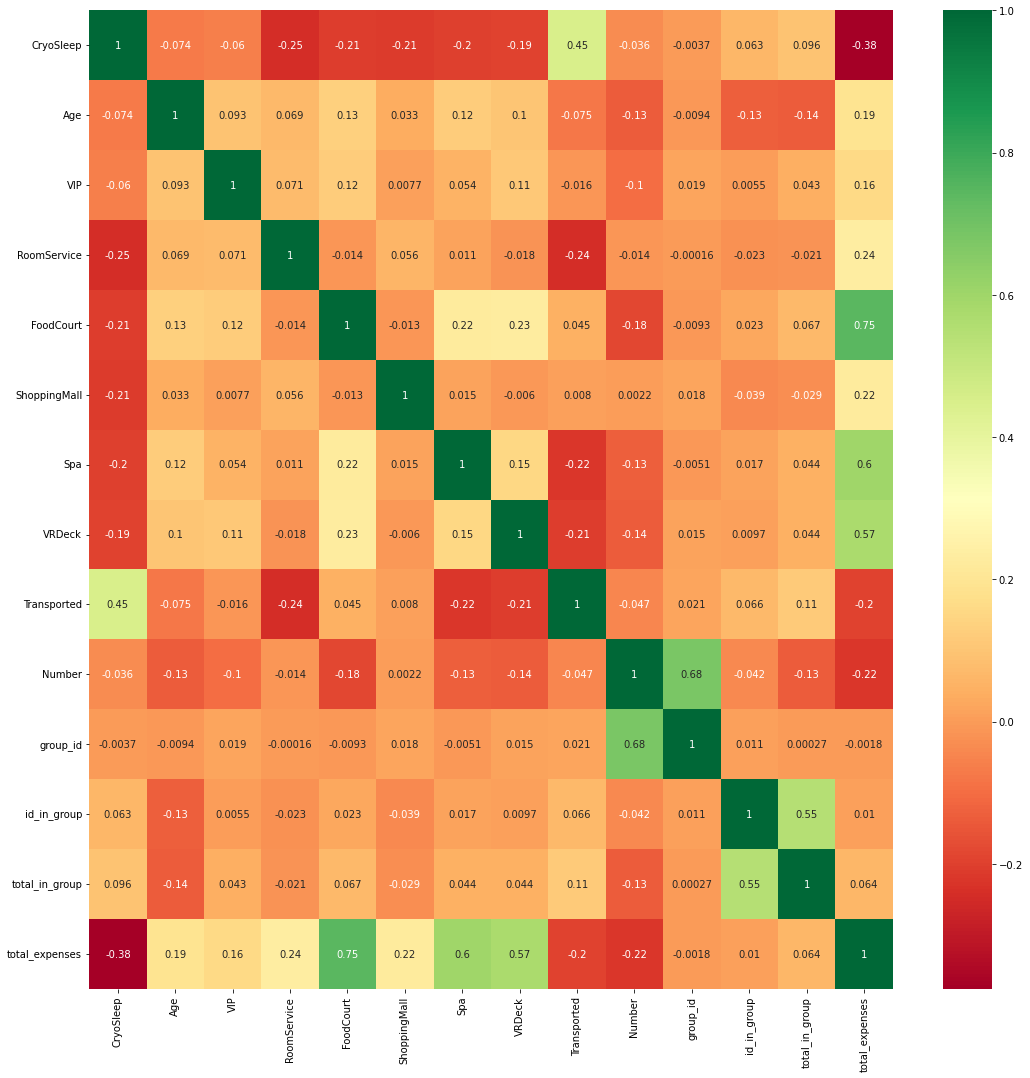

In [48]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# Filling remaining Nan values

In [49]:
#numerical data
def numerical_(df):
    data_num=df.select_dtypes(['float64','int64'])
    cols_num = list(data_num.columns)
    dict_num = {i:cols_num[i] for i in range(len(cols_num)) }
    imputer = SimpleImputer(strategy='mean')
    d=imputer.fit_transform(data_num)
    temp1=pd.DataFrame(d)
    temp1= temp1.rename(columns=dict_num)
    return temp1

In [50]:
#dtype-Object
def object_(df):
    obj_data = df.select_dtypes(['object','category']) 
    cols = list(obj_data.columns)
    for col in cols:
        obj_data[col].fillna(obj_data[col].mode()[0],inplace=True)
        pass
    for i in cols:
        un = obj_data[i].unique()
        ran = range(1,len(un)+1)
        obj_data.replace(dict(zip(un,ran)) ,inplace=True)
    obj_data = pd.get_dummies(obj_data, columns=['HomePlanet', 'Destination'])
    return obj_data

In [51]:
#boolean data
def boolean_(df): 
    bool_data = df.select_dtypes(['bool'])
    cols = bool_data.columns
    for i in cols:
        bool_data[i] = LabelEncoder().fit_transform(bool_data[i])
    return bool_data

In [52]:
test_num = numerical_(test)
train_num = numerical_(train)

bins=[0,13,18,25,200]
labels=['<=13','13-18','18-25','>25']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

train['total_expenses']=train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
test['total_expenses']=test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
bins=[0,500,1000,100000]
labels=['0-500','500-1000','1000-1000000']
train['expenses_group'] = pd.cut(train['total_expenses'], bins=bins, labels=labels, right=False)
test['expenses_group'] = pd.cut(test['total_expenses'], bins=bins, labels=labels, right=False)

In [53]:
test_cat = object_(test)
train_cat = object_(train)
train_bool = boolean_(train)
test_bool = boolean_(test)
train_data = pd.concat([train_num,train_cat,train_bool],axis=1)
test_data = pd.concat([test_num,test_cat,test_bool],axis=1)

In [54]:
train_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Number', 'group_id', 'id_in_group', 'total_in_group', 'total_expenses',
       'PassengerId', 'Cabin', 'Name', 'Deck', 'Side', 'AgeGroup',
       'expenses_group', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3',
       'Destination_1', 'Destination_2', 'Destination_3', 'CryoSleep', 'VIP',
       'Transported'],
      dtype='object')

In [55]:
train_data.dtypes

Age               float64
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Number            float64
group_id          float64
id_in_group       float64
total_in_group    float64
total_expenses    float64
PassengerId         int64
Cabin               int64
Name                int64
Deck                int64
Side                int64
AgeGroup            int64
expenses_group      int64
HomePlanet_1        uint8
HomePlanet_2        uint8
HomePlanet_3        uint8
Destination_1       uint8
Destination_2       uint8
Destination_3       uint8
CryoSleep           int64
VIP                 int64
Transported         int64
dtype: object

In [56]:
#Onehotencoder
#enc = OneHotEncoder()
#transformed = enc.fit_transform(train_data[['AgeGroup']])
#train_data[enc.categories_[0]] = transformed.toarray()

In [57]:
#enc = OneHotEncoder()
#transformed = enc.fit_transform(test_data[['AgeGroup']])
#test_data[enc.categories_[0]] = transformed.toarray()

# Predictions using RandomForestClassifier

In [58]:
###Predictions 
##using RandomForestClassifier

In [59]:
train_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Number', 'group_id', 'id_in_group', 'total_in_group', 'total_expenses',
       'PassengerId', 'Cabin', 'Name', 'Deck', 'Side', 'AgeGroup',
       'expenses_group', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3',
       'Destination_1', 'Destination_2', 'Destination_3', 'CryoSleep', 'VIP',
       'Transported'],
      dtype='object')

In [60]:
predictor_cols=['HomePlanet_1','HomePlanet_2','HomePlanet_3','Destination_1','Destination_2','Destination_3','RoomService', 
                'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','VIP','CryoSleep','id_in_group','group_id',
               'Side','Number','total_expenses','Age','total_in_group']

In [61]:
X = train_data[predictor_cols]
Y=train_data['Transported']

In [62]:
X.dtypes

HomePlanet_1        uint8
HomePlanet_2        uint8
HomePlanet_3        uint8
Destination_1       uint8
Destination_2       uint8
Destination_3       uint8
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
VIP                 int64
CryoSleep           int64
id_in_group       float64
group_id          float64
Side                int64
Number            float64
total_expenses    float64
Age               float64
total_in_group    float64
dtype: object

In [63]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=40)

In [64]:
params = {
    "n_estimators": [i for i in range (10, 800, 10)], 
    "max_depth": [i for i in range (2, 40, 2)],
    "min_samples_leaf" : [i for i in range (15, 40)],
    "min_samples_split" : [i for i in range (5,240)]
}
params = {
    "n_estimators": [i for i in range (50, 400, 50)], 
    "max_depth": [i for i in range (6, 18, 2)]
}

In [65]:
rfc=RandomForestClassifier()
RF_grid = {'n_estimators': [50 ,100, 150, 200,250,300], 'max_depth': [ 6,8, 10, 12,14]}
#grid = GridSearchCV(rfc, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid = RandomizedSearchCV(estimator = rfc, param_distributions = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search = grid.fit(x_train, y_train)
accuracy = grid_search.best_score_ *100
print(accuracy)

80.04049671836937


In [66]:
#grid = RandomizedSearchCV(estimator = rcla, param_distributions = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
best_param_rf = grid_search.best_params_

In [67]:
rcla = RandomForestClassifier(**best_param_rf)
rcla.fit(x_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=200)

In [68]:
predicted = rcla.predict_proba(x_val)[:,1]
train_score = accuracy_score(predicted.round(),y_val)*100
print("Accuracy using Random Forest on training data is {} %".format(train_score))

Accuracy using Random Forest on training data is 79.58596894767108 %


In [69]:
predicted_val = rcla.predict(test_data[predictor_cols])
predicted_val=predicted_val.round()

# XGBoost

In [70]:
from xgboost import XGBClassifier

In [71]:
xg=XGBClassifier()
#grid = RandomizedSearchCV(estimator = xg, param_distributions = params, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid = GridSearchCV(rfc, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(x_train, y_train)
accuracy = grid_search.best_score_ *100
print(accuracy)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
80.14092863640123


In [72]:
#grid = RandomizedSearchCV(estimator = rcla, param_distributions = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
best_param_rf = grid_search.best_params_

In [73]:
xgc = XGBClassifier(**best_param_rf)
xgc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=14, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
predicted = xgc.predict_proba(x_val)[:,1]
train_score = accuracy_score(predicted.round(),y_val)*100
print("Accuracy using Random Forest on training data is {} %".format(train_score))

Accuracy using Random Forest on training data is 80.67855089131685 %


In [75]:
predicted_val = xgc.predict(test_data[predictor_cols])
predicted_val=predicted_val.round()

# CatBoost Classifier

In [76]:
cat = CatBoostClassifier()
cat.fit(x_train, y_train, verbose = 50, early_stopping_rounds = 150)

Learning rate set to 0.023581
0:	learn: 0.6811618	total: 57.2ms	remaining: 57.2s
50:	learn: 0.4701715	total: 237ms	remaining: 4.42s
100:	learn: 0.4224337	total: 425ms	remaining: 3.78s
150:	learn: 0.4018511	total: 614ms	remaining: 3.45s
200:	learn: 0.3890264	total: 788ms	remaining: 3.13s
250:	learn: 0.3786758	total: 974ms	remaining: 2.9s
300:	learn: 0.3696756	total: 1.15s	remaining: 2.67s
350:	learn: 0.3619335	total: 1.32s	remaining: 2.45s
400:	learn: 0.3548920	total: 1.5s	remaining: 2.24s
450:	learn: 0.3476601	total: 1.67s	remaining: 2.04s
500:	learn: 0.3396955	total: 1.85s	remaining: 1.85s
550:	learn: 0.3322386	total: 2.04s	remaining: 1.66s
600:	learn: 0.3253701	total: 2.21s	remaining: 1.47s
650:	learn: 0.3185711	total: 2.39s	remaining: 1.28s
700:	learn: 0.3123135	total: 2.56s	remaining: 1.09s
750:	learn: 0.3067624	total: 2.74s	remaining: 910ms
800:	learn: 0.3013377	total: 2.92s	remaining: 725ms
850:	learn: 0.2958314	total: 3.1s	remaining: 543ms
900:	learn: 0.2908665	total: 3.28s	rema

In [77]:
predicted= cat.predict(x_train)
predicted

array([0, 0, 0, ..., 1, 0, 0])

In [78]:
predicted= cat.predict(x_train)
predicted=predicted.astype(bool)
train_score = accuracy_score(predicted, y_train)*100
print("Accuracy using CatBoost on training data is {} %".format(train_score))

Accuracy using CatBoost on training data is 88.40954846131723 %


In [79]:
predicted= cat.predict(x_val)
predicted=predicted.astype(bool)
train_score = accuracy_score(predicted, y_val)*100
print("Accuracy using CatBoost on training data is {} %".format(train_score))

Accuracy using CatBoost on training data is 80.73605520414031 %


In [80]:
predicted_val2 = cat.predict(test_data[predictor_cols])
predicted_val2=predicted_val2.astype(bool)

In [81]:
my_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': predicted_val})
my_submission['Transported']=my_submission['Transported'].astype(bool)

In [82]:
my_submission.to_csv('submission.csv', index=False)